In [1]:
import pandas as pd

In [2]:
data=pd.DataFrame({'A':[1,2,3,4,6,5,7,5,8],
                  'B':[5,6,4,9,7,6,4,7,9],
                  'C':[0,0,0,0,0,0,0,0,0],
                  'D':[1,1,1,1,1,1,1,1,1]})

In [3]:
data.head()

,A,B,C,D
0,1,5,0,1
1,2,6,0,1
2,3,4,0,1
3,4,9,0,1
4,6,7,0,1


#### Variance Threshold

In [4]:
from sklearn.feature_selection import VarianceThreshold
var_thr=VarianceThreshold(threshold=0)
var_thr.fit(data)

VarianceThreshold(threshold=0)

In [5]:
var_thr.get_support()

array([ True,  True, False, False])

In [6]:
data.columns[var_thr.get_support()]

Index(['A', 'B'], dtype='object')

In [8]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thr.get_support()]]

print(len(constant_columns))
        

2


In [9]:
data.drop(constant_columns,axis=1)

,A,B
0,1,5
1,2,6
2,3,4
3,4,9
4,6,7
5,5,6
6,7,4
7,5,7
8,8,9


In [12]:
from sklearn.feature_selection import VarianceThreshold

In [14]:
df=pd.read_csv('santander.csv')

In [20]:
df1=pd.DataFrame(df)

In [25]:
df1.shape

(76020, 371)

In [35]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [38]:
X.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape,X_test.shape

((50933, 370), (25087, 370))

In [43]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [44]:
sum(var_thres.get_support())

315

In [51]:
constant_columns=[column for column in X_train.columns
                 if column not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))

55


In [50]:
len(X_train.columns[var_thres.get_support()])

315

In [53]:
X_train.drop(constant_columns,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
28076,56183,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
21646,43354,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,407115.540000
15633,31400,2,43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85564.710000
61843,123436,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
54701,109140,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72880.980000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,74348,2,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195450.930000
6265,12597,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84892.950000
54886,109515,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63733.770000
860,1703,2,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101492.340000


# Feature selection using Correlation

In [1]:
import pandas as pd
import sklearn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data=load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['MEDV']=data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
X=df.drop(['MEDV'],axis=1)
y=df['MEDV']

In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)
X_train, X_test

(         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE      DIS   RAD    TAX  \
 445  10.67180   0.0  18.10   0.0  0.740  6.459  94.8   1.9879  24.0  666.0   
 428   7.36711   0.0  18.10   0.0  0.679  6.193  78.1   1.9356  24.0  666.0   
 481   5.70818   0.0  18.10   0.0  0.532  6.750  74.9   3.3317  24.0  666.0   
 55    0.01311  90.0   1.22   0.0  0.403  7.249  21.9   8.6966   5.0  226.0   
 488   0.15086   0.0  27.74   0.0  0.609  5.454  92.7   1.8209   4.0  711.0   
 ..        ...   ...    ...   ...    ...    ...   ...      ...   ...    ...   
 486   5.69175   0.0  18.10   0.0  0.583  6.114  79.8   3.5459  24.0  666.0   
 189   0.08370  45.0   3.44   0.0  0.437  7.185  38.9   4.5667   5.0  398.0   
 495   0.17899   0.0   9.69   0.0  0.585  5.670  28.8   2.7986   6.0  391.0   
 206   0.22969   0.0  10.59   0.0  0.489  6.326  52.5   4.3549   4.0  277.0   
 355   0.10659  80.0   1.91   0.0  0.413  5.936  19.5  10.5857   4.0  334.0   
 
      PTRATIO       B  LSTAT  
 445     20.2   43.

In [18]:
import seaborn as sns

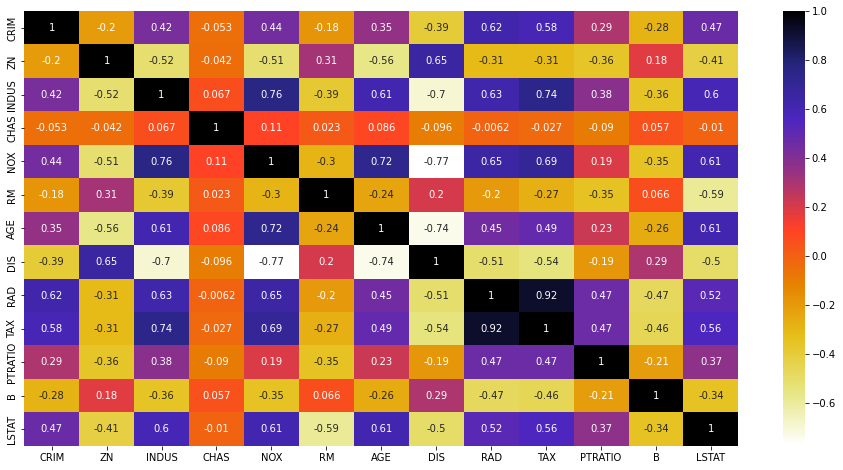

In [20]:
plt.figure(figsize=(16,8))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [29]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return(col_corr)


In [32]:
corr_features=correlation(X_train,0.7)

In [33]:
len(set(corr_features))

4

In [35]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [36]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
226,0.38214,0.0,6.20,0.0,8.040,8.0,17.4,387.38,3.13
292,0.03615,80.0,4.95,0.0,6.630,4.0,19.2,396.90,4.70
90,0.04684,0.0,3.41,0.0,6.417,2.0,17.8,392.18,8.81
373,11.10810,0.0,18.10,0.0,4.906,24.0,20.2,396.90,34.77
273,0.22188,20.0,6.96,1.0,7.691,3.0,18.6,390.77,6.58
...,...,...,...,...,...,...,...,...,...
60,0.14932,25.0,5.13,0.0,5.741,8.0,19.7,395.11,13.15
108,0.12802,0.0,8.56,0.0,6.474,5.0,20.9,395.24,12.27
298,0.06466,70.0,2.24,0.0,6.345,5.0,14.8,368.24,4.97
138,0.24980,0.0,21.89,0.0,5.857,4.0,21.2,392.04,21.32
